<a href="https://colab.research.google.com/github/Sinamhd9/Concrete-Compressive-Strength/blob/main/starter_concrete_compressive_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description
    
Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete. These components can affect the compressive strength of the concrete. To obtain the real compressive strength of concrete (target labels in the dataset), an engineer needs to break the cylinder samples under the compression-testing machine. The failure load is divided by the cylinder's cross-section to obtain the compressive strength. Engineers use different kinds of concretes for different building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi (17.2 MPa). Concrete is a material with high strength in compression, but low strength in tension. That is why engineers use reinforced concrete (usually with steel rebars) to build structures. Let's see if we can find a linear or non-linear relationship between concrete's components and its compressive strength. The building components in this dataset are Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer,Coarse Aggregate, and Fine Aggregate. We have also the information of the age, which is an important factor.


# Explanatory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=2)

<a id="21"></a>

## Data examples

In [ ]:
df_train = pd.read_excel("/kaggle/input/Concrete_Data.xls")
print(df_train.shape)
display(df_train.head())

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


<a id="22"></a>

## Data types

In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

<a id="23"></a>

## Statistics

In [ ]:
display(df_train.describe())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


We can see all columns have non-null values which means there are no missing values. All the columns are float data types except the age column which is integer.

<a id="24"></a>

## Features

Next, we will plot the features distribution and it's relationship with the target variable.

<a id="241"></a>

### Cement

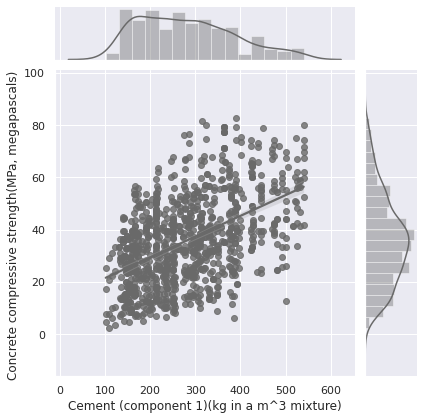

In [ ]:
cols = df_train.columns
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=df_train, x=cols[0], y=cols[-1]
                  ,kind='reg',color=color[0])
plt.show()

<a id="242"></a>

### Blast Furnace Slag

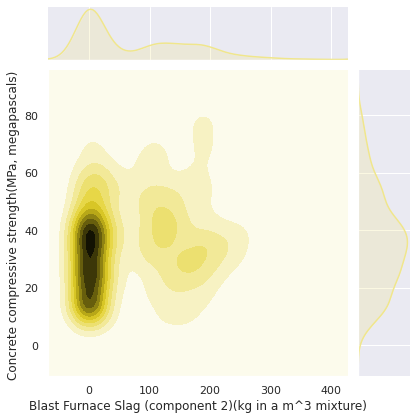

In [ ]:
sns.jointplot(data=df_train, x=cols[1], y=cols[-1]
                  ,kind='kde',color=color[1])
plt.show()

<a id="243"></a>

### Fly ash

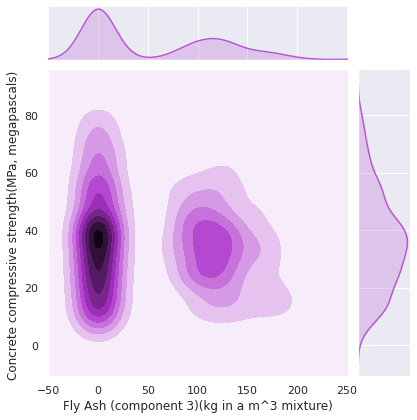

In [ ]:
sns.jointplot(data=df_train, x=cols[2], y=cols[-1]
                  ,kind='kde',color=color[2])
plt.show()

<a id="244"></a>

### Water

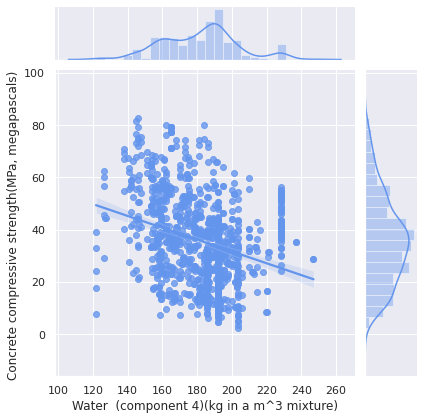

In [ ]:
sns.jointplot(data=df_train, x=cols[3], y=cols[-1]
                  ,kind='reg',color=color[3])
plt.show()

<a id="245"></a>

### Superplasticizer

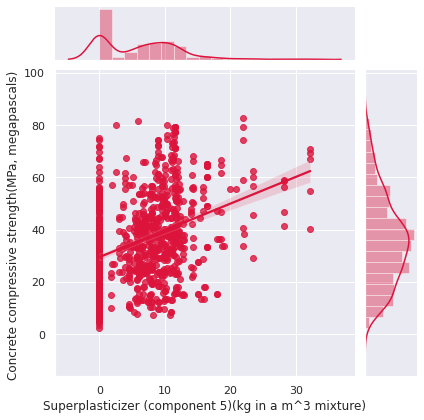

In [ ]:
sns.jointplot(data=df_train, x=cols[4], y=cols[-1]
                  ,kind='reg',color=color[4])
plt.show()

<a id="246"></a>

### Coarse Aggregate 

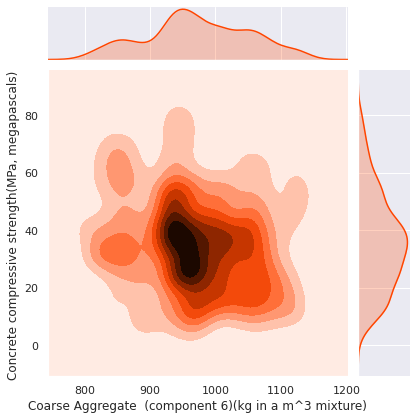

In [ ]:
sns.jointplot(data=df_train, x=cols[5], y=cols[-1]
                  ,kind='kde',color=color[5])
plt.show()

<a id="247"></a>

### Fine Aggregate 

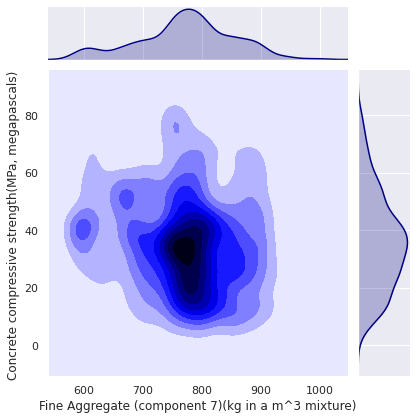

In [ ]:
sns.jointplot(data=df_train, x=cols[6], y=cols[-1]
                  ,kind='kde',color=color[6])
plt.show()

<a id="248"></a>

### Age 

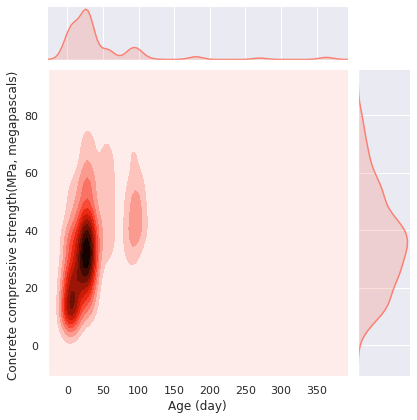

In [ ]:
sns.jointplot(data=df_train, x=cols[7], y=cols[-1]
                  ,kind='kde',color=color[7])
plt.show()

<a id="25"></a>

## Preprocessing

We will normalize our features using standardscaler which sets the mean to zero and standard deviation to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = pd.DataFrame(columns=cols[:-1], data=sc.fit_transform(df_train.drop(cols[-1],axis=1)))
display(X.head(3))
y = df_train[cols[-1]]
display(y.head(3))

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066


0    79.986111
1    61.887366
2    40.269535
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

Here we visualize the features distribution after normalization.

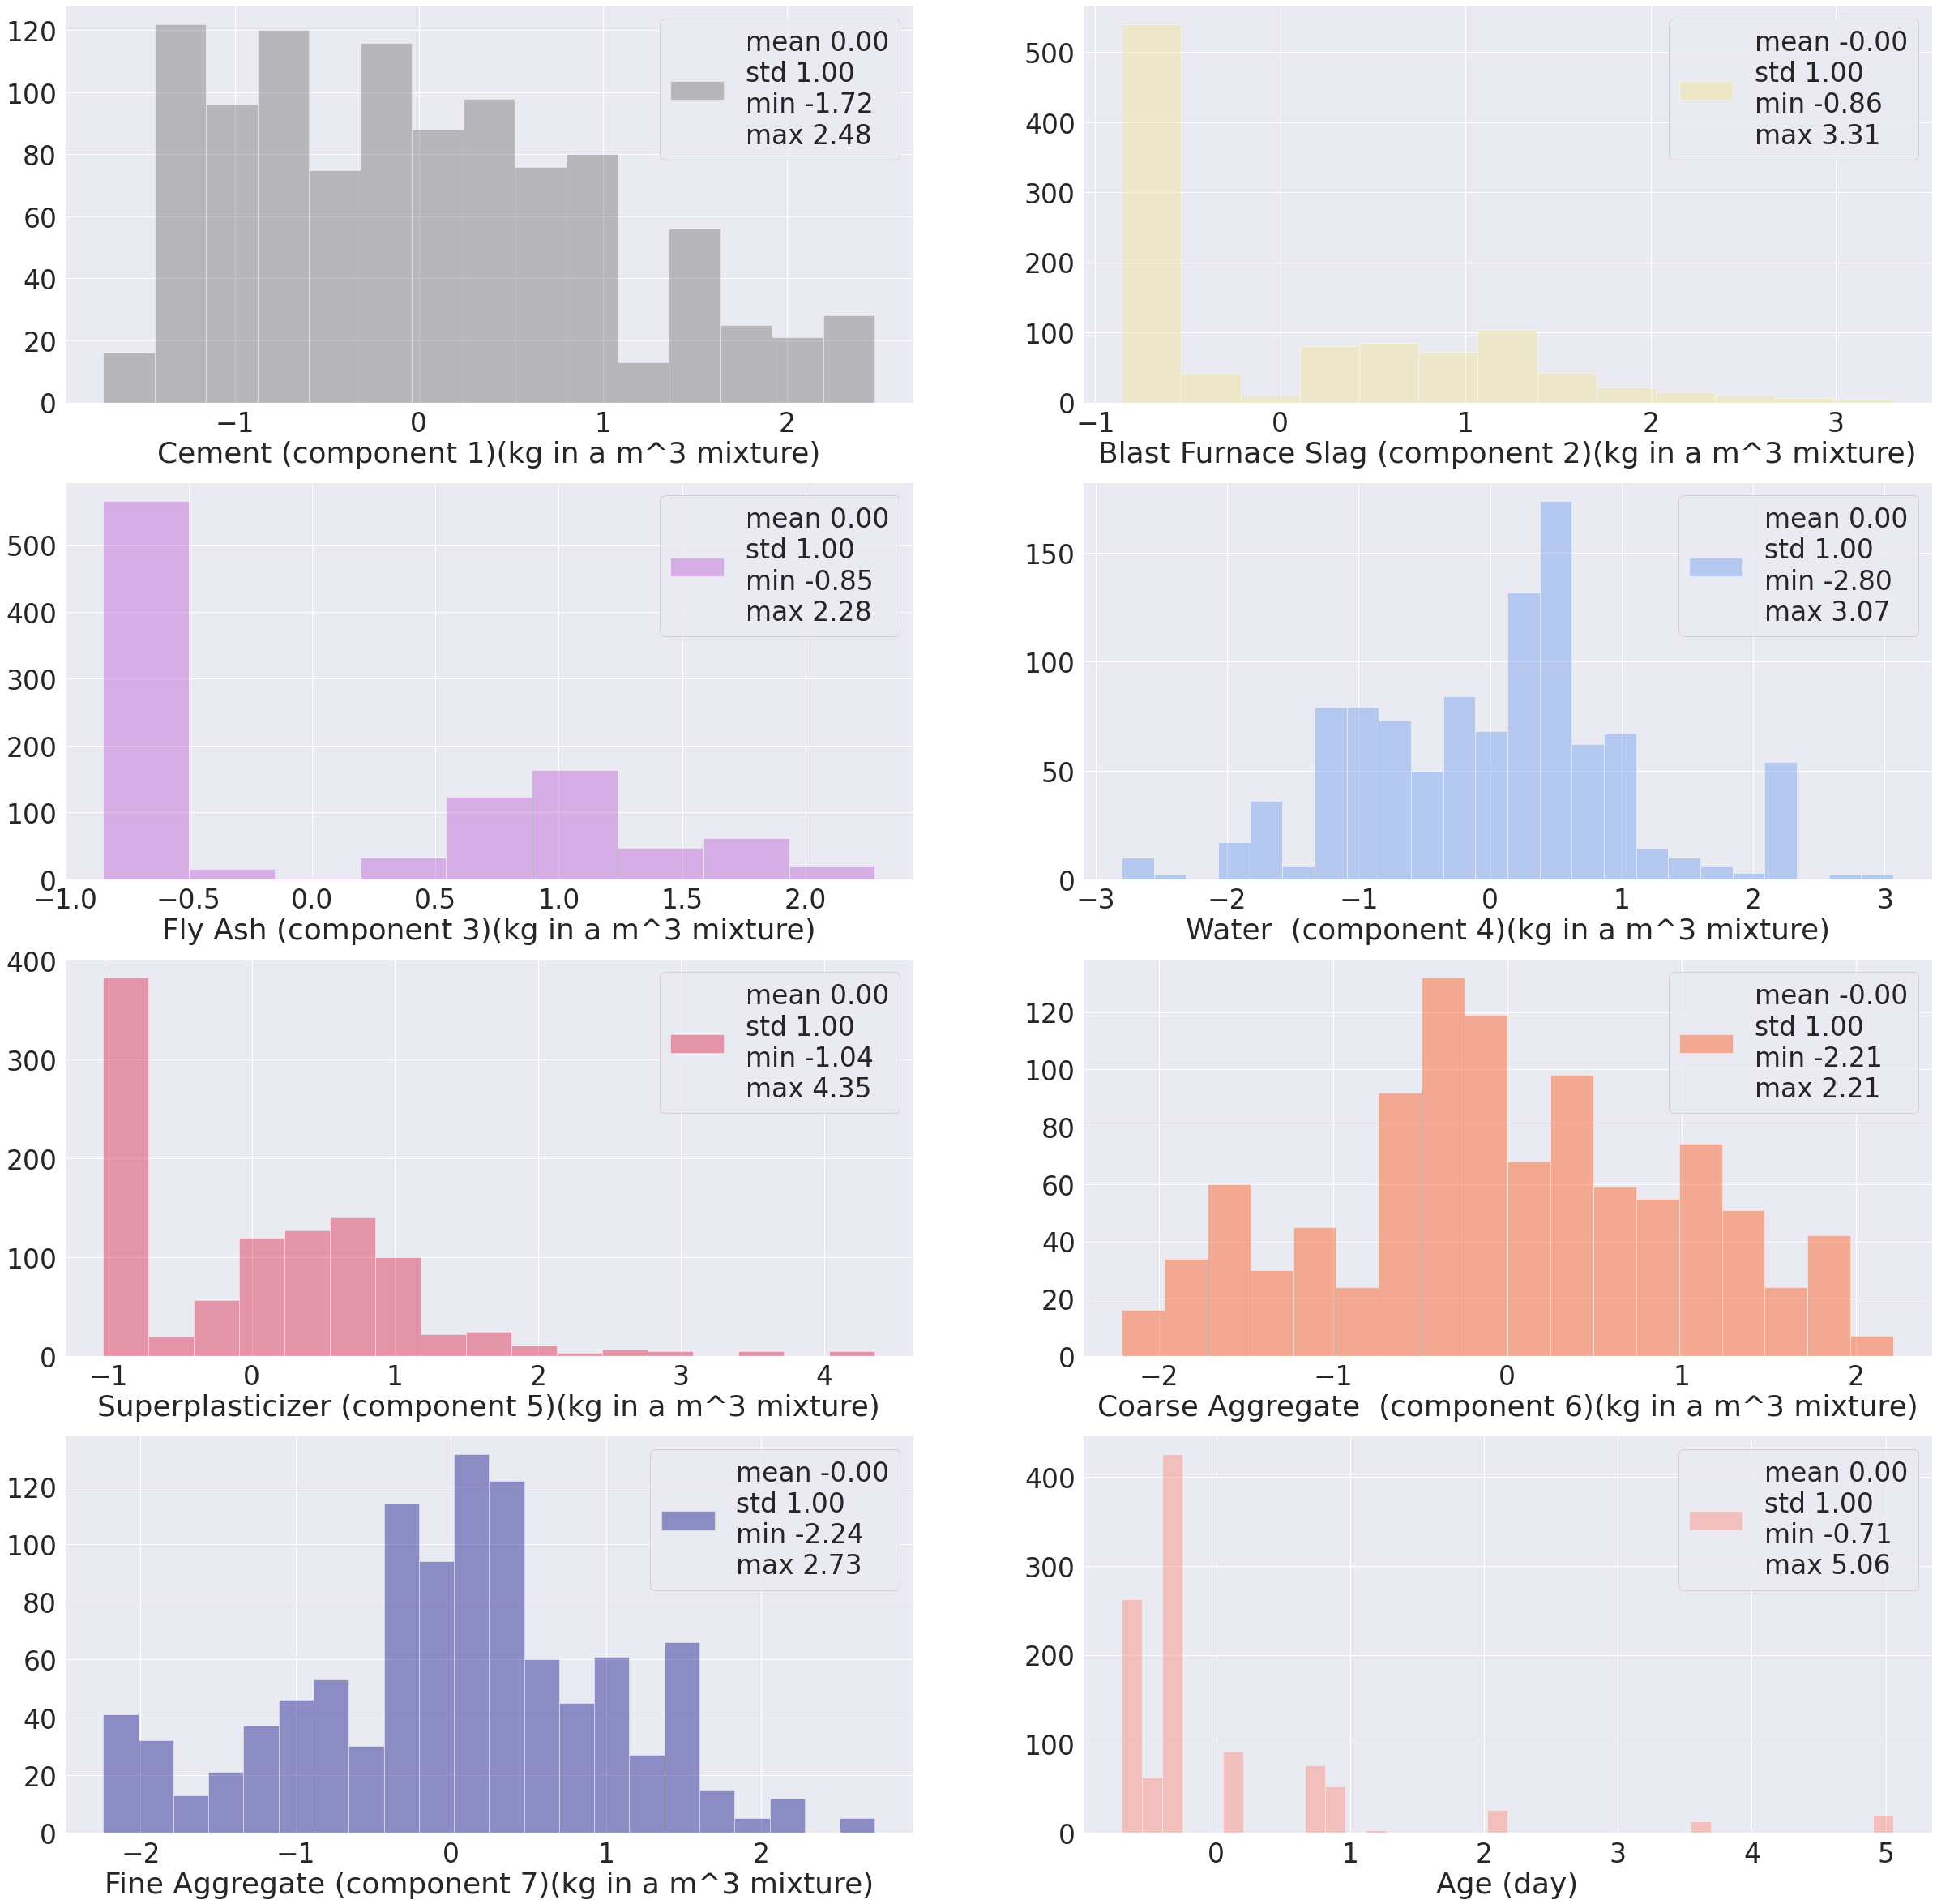

In [ ]:
sns.set(font_scale=3)
cols = X.columns
n_row = len(cols)
n_col = 2
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X[cols[i]],norm_hist=False,kde=False, color=color[i],
                 label=['mean '+str('{:.2f}'.format(X.iloc[:,i].mean()))
                        +'\n''std '+str('{:.2f}'.format(X.iloc[:,i].std()))
                        +'\n''min '+str('{:.2f}'.format(X.iloc[:,i].min()))
                        +'\n''max '+str('{:.2f}'.format(X.iloc[:,i].max()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

#Training

<a id="31"></a>

## Scikit-learn models
We will train four different models of linear regression, random forest, Xgboost, and lightgbm. We use KFold with 5 splits to perform cross-validation. Mean absolute error and r2_score are used to evaluate the models.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from time import time

def test_models(mlds):
    for i in range(len(mlds)):
        r2 = []
        mae = []
        model = mlds[i]
        n= 0 
        for tr, te in KFold(n_splits=5,random_state=42, shuffle=True).split(X, y):
            st_time = time()
            X_tr = X.iloc[tr, :]
            y_tr = y.iloc[tr]
            X_val = X.iloc[te, :]
            y_val = y.iloc[te]
            model.fit(X_tr, y_tr)
            y_preds = model.predict(X_val)
            r2.append(r2_score(y_val, y_preds))
            mae.append(mean_absolute_error(y_val, y_preds))
            en_time = time()
            print('Time:',str(en_time-st_time),'Fold:',str(n),'r2:',str(r2[n]),'mae:',str(mae[n]))
            n+=1
        print('mean_r2', np.mean(r2))
        print('-----------------------------')

    
seed = 42
models = [LinearRegression(),RandomForestRegressor(random_state=seed, n_jobs=-1),
          XGBRegressor(random_state=seed, n_jobs=-1),LGBMRegressor(random_state=seed,n_jobs=-1)]
test_models(models)

Time: 0.014979362487792969 Fold: 0 r2: 0.6275416055429016 mae: 7.745392872421347
Time: 0.0070574283599853516 Fold: 1 r2: 0.5938985928022891 mae: 9.243166303209966
Time: 0.007125139236450195 Fold: 2 r2: 0.5573070483006534 mae: 9.00093412289651
Time: 0.008048057556152344 Fold: 3 r2: 0.6774636293624203 mae: 7.5388688897790646
Time: 0.009060144424438477 Fold: 4 r2: 0.5469672475998619 mae: 8.18302949187236
mean_r2 0.6006356247216253
-----------------------------
Time: 0.5927600860595703 Fold: 0 r2: 0.8734396756714482 mae: 3.877487797227314
Time: 0.582991361618042 Fold: 1 r2: 0.9084695642958017 mae: 3.6931461985228062
Time: 0.5903763771057129 Fold: 2 r2: 0.9118687271014672 mae: 3.2031554887207467
Time: 0.4872720241546631 Fold: 3 r2: 0.915040319187414 mae: 3.570731495845092
Time: 0.4838075637817383 Fold: 4 r2: 0.920467788833401 mae: 3.1929609148945914
mean_r2 0.9058572150179064
-----------------------------
Time: 0.15757131576538086 Fold: 0 r2: 0.904397316408117 mae: 3.073231006299042
Time: 0

<a id="32"></a>
## Neural network
And here, we train a neural network.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_model(hid_layers,num_cols, drop_rate):
    inp = layers.Input(shape=(num_cols,))
    x = layers.BatchNormalization()(inp)
    for i, units in enumerate(hid_layers):
        x= layers.Dense(units, 'relu')(x)
        x = layers.Dropout(drop_rate)(x)
        x = layers.BatchNormalization()(x)

    output = layers.Dense(1, 'linear')(x)
    
    model = tf.keras.models.Model(inputs=inp,outputs=output)
    model.compile(optimizer='adam', loss='mae')
    return model

hid_layers = [300,200,100]
model = create_model(hid_layers, X.shape[1], 0.2)


In [ ]:

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def callbacks():
    rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 0, 
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min')
        
    ckp = ModelCheckpoint(f'bests_weights.hdf5', monitor = 'val_loss', verbose = 0, 
                              save_best_only = True, save_weights_only = True, mode = 'min')
        
    es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 15, mode = 'min', 
                           baseline = None, restore_best_weights = True, verbose = 0)
    return [rlr, ckp, es]

In [ ]:
import tensorflow.keras.backend as K
loss_mae = []
r2_scores = []

fold = 0
for tr, te in KFold(n_splits=5, random_state=42, shuffle=True).split(X,y):
    X_tr = X.iloc[tr, :]
    X_val = X.iloc[te, :]
    y_tr = y.iloc[tr]
    y_val = y.iloc[te]
    history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), callbacks=callbacks(),
                        epochs=300, verbose=0)
    model.load_weights('bests_weights.hdf5')
    y_preds = model.predict(X_val)
    loss_mae.append(mean_absolute_error(y_val, y_preds))
    r2_scores.append(r2_score(y_val, y_preds))
    print(f'fold',str(fold)+':','mae:',loss_mae[fold],'r2_score:',r2_scores[fold])
    K.clear_session()
    fold+=1
print("mae: %0.2f (+/- %0.2f)" % (np.mean(loss_mae), np.std(loss_mae) * 2),'mean_r2:', np.mean(r2_scores))



fold 0: mae: 4.660020205249607 r2_score: 0.8539652933099517
fold 1: mae: 4.110738593526511 r2_score: 0.904496354431502
fold 2: mae: 3.8272009169189642 r2_score: 0.8978017154361624
fold 3: mae: 3.7374788591478247 r2_score: 0.9163732027265944
fold 4: mae: 4.01801951650811 r2_score: 0.8816334269674524
mae: 4.07 (+/- 0.65) mean_r2: 0.8908539985743325
